Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [ ]:
%run ImportFunctions.ipynb

# [2] Import Libraries

In [ ]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_recall_fscore_support,
)
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [ ]:
# Load images and labels
augmented_images = np.load('/content/drive/My Drive/FYP/dataset/augmented_images.npy')
augmented_labels = np.load('/content/drive/My Drive/FYP/dataset/augmented_labels.npy')

## [3.2] Jupyter

In [ ]:
# Load images and labels
augmented_images = np.load('dataset/augmented_images.npy')
augmented_labels = np.load('dataset/augmented_labels.npy')

# [4] Prepare Dataset

In [ ]:
augmented_images = resize_images(augmented_images, (224,224))

In [ ]:
# Display array shapes
display_array_shapes(augmented_images, augmented_labels)

+--------------+---------------------+
| Array Name   | Shape               |
+==============+=====================+
| Images       | (1211, 224, 224, 3) |
+--------------+---------------------+
| Labels       | (1211,)             |
+--------------+---------------------+


In [ ]:
# Get the number of unique labels
num_classes = len(np.unique(augmented_labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [ ]:
# Binarize labels
augmented_labels_binarized = binarize_labels(augmented_labels)

# [5] Train Model

In [ ]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(augmented_images, augmented_labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (968, 224, 224, 3) (968, 9)
Validation shape: (121, 224, 224, 3) (121, 9)
Test shape: (122, 224, 224, 3) (122, 9)


## [5.1] VGG-19

In [ ]:
# Build and compile VGG19 model
vgg19_model = build_and_compile_vgg19_model(num_classes)

2024-03-22 15:49:32.259973: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-03-22 15:49:32.260006: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-03-22 15:49:32.260237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
from tensorflow.keras.utils import plot_model

vgg19_model = build_and_compile_vgg19_model(9)

# Generate visual representation of the model architecture and save it to a file
plot_model(vgg19_model, to_file='vgg19_model_architecture.png', show_shapes=True)

vgg19_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Train the model
vgg19_history = vgg19_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
vgg19_loss, vgg19_accuracy = vgg19_model.evaluate(X_val, y_val)

Epoch 1/10
24/24 [==============================] - 31s 1s/step - loss: 2.4848 - accuracy: 0.3657 - val_loss: 1.8953 - val_accuracy: 0.3719
Epoch 2/10
24/24 [==============================] - 30s 1s/step - loss: 0.9445 - accuracy: 0.6684 - val_loss: 1.4246 - val_accuracy: 0.5620
Epoch 3/10
24/24 [==============================] - 30s 1s/step - loss: 0.4490 - accuracy: 0.8771 - val_loss: 1.2618 - val_accuracy: 0.5455
Epoch 4/10
24/24 [==============================] - 29s 1s/step - loss: 0.2461 - accuracy: 0.9587 - val_loss: 1.2670 - val_accuracy: 0.5372
Epoch 5/10
24/24 [==============================] - 29s 1s/step - loss: 0.1517 - accuracy: 0.9948 - val_loss: 1.1141 - val_accuracy: 0.5950
Epoch 6/10
24/24 [==============================] - 29s 1s/step - loss: 0.1121 - accuracy: 0.9969 - val_loss: 1.1008 - val_accuracy: 0.6198
Epoch 7/10
24/24 [==============================] - 29s 1s/step - loss: 0.0859 - accuracy: 1.0000 - val_loss: 1.1131 - val_accuracy: 0.6694
Epoch 8/10
24/24 [==

In [ ]:
# Calculate average loss and accuracy
vgg19_average_loss = sum(vgg19_history.history['val_loss']) / len(vgg19_history.history['val_loss'])
vgg19_average_accuracy = sum(vgg19_history.history['val_accuracy']) / len(vgg19_history.history['val_accuracy'])

print(f"Average Validation Loss: {vgg19_average_loss}, Average Validation Accuracy: {vgg19_average_accuracy}")

Average Validation Loss: 1.249226725101471, Average Validation Accuracy: 0.5776859551668168


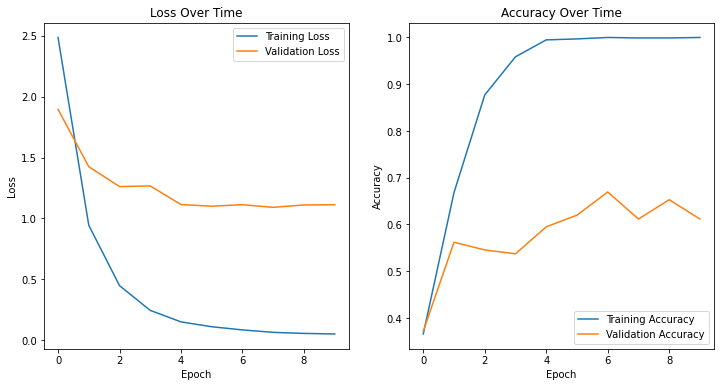

In [ ]:
plot_training_history(vgg19_history)

## [5.2] ResNet-101

In [ ]:
# Build and compile ResNet101 model
resnet101_model = build_and_compile_resnet101_model(num_classes)

In [ ]:
# Train the model
resnet101_history = resnet101_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
resnet101_loss, resnet101_accuracy = resnet101_model.evaluate(X_val, y_val)

Epoch 1/10
24/24 [==============================] - 36s 1s/step - loss: 7.0914 - accuracy: 0.1477 - val_loss: 3.0368 - val_accuracy: 0.2314
Epoch 2/10
24/24 [==============================] - 31s 1s/step - loss: 2.4453 - accuracy: 0.2645 - val_loss: 2.6781 - val_accuracy: 0.1983
Epoch 3/10
24/24 [==============================] - 32s 1s/step - loss: 2.4000 - accuracy: 0.2428 - val_loss: 2.1066 - val_accuracy: 0.3140
Epoch 4/10
24/24 [==============================] - 33s 1s/step - loss: 1.9471 - accuracy: 0.3626 - val_loss: 2.1870 - val_accuracy: 0.2314
Epoch 5/10
24/24 [==============================] - 32s 1s/step - loss: 2.4235 - accuracy: 0.2965 - val_loss: 4.2163 - val_accuracy: 0.0992
Epoch 6/10
24/24 [==============================] - 33s 1s/step - loss: 2.4146 - accuracy: 0.2996 - val_loss: 2.9224 - val_accuracy: 0.2893
Epoch 7/10
24/24 [==============================] - 32s 1s/step - loss: 2.2140 - accuracy: 0.3864 - val_loss: 2.7758 - val_accuracy: 0.2975
Epoch 8/10
24/24 [==

In [ ]:
# Calculate average loss and accuracy
resnet101_average_loss = sum(resnet101_history.history['val_loss']) / len(resnet101_history.history['val_loss'])
resnet101_average_accuracy = sum(resnet101_history.history['val_accuracy']) / len(resnet101_history.history['val_accuracy'])

print(f"Average Validation Loss: {resnet101_average_loss}, Average Validation Accuracy: {resnet101_average_accuracy}")

Average Validation Loss: 2.851079297065735, Average Validation Accuracy: 0.22892562076449394


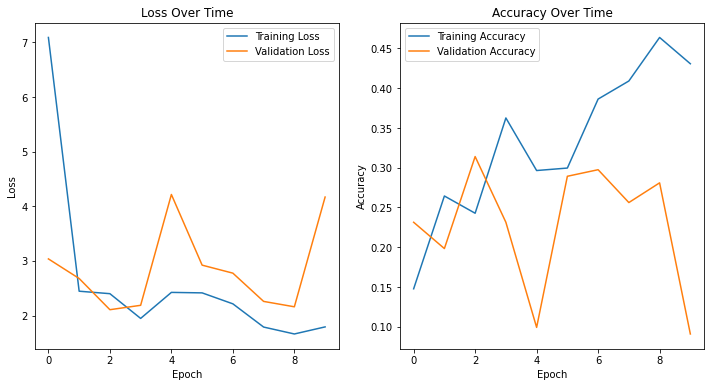

In [ ]:
# Plot training history
plot_training_history(resnet101_history)

## [5.3] MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Build and compile MobileNetV3 model
mobilenetv2_model = build_and_compile_mobilenetv2_model(num_classes)

In [ ]:
# Train the model
mobilenetv2_history = mobilenetv2_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
mobilenetv2_loss, mobilenetv2_accuracy = mobilenetv2_model.evaluate(X_val, y_val)

Epoch 1/10
24/24 [==============================] - 9s 260ms/step - loss: 4.9528 - accuracy: 0.5413 - val_loss: 3.6555 - val_accuracy: 0.6860
Epoch 2/10
24/24 [==============================] - 6s 238ms/step - loss: 0.9399 - accuracy: 0.8905 - val_loss: 2.7367 - val_accuracy: 0.7769
Epoch 3/10
24/24 [==============================] - 6s 233ms/step - loss: 0.1541 - accuracy: 0.9742 - val_loss: 2.3822 - val_accuracy: 0.8099
Epoch 4/10
24/24 [==============================] - 6s 232ms/step - loss: 0.0465 - accuracy: 0.9928 - val_loss: 2.0342 - val_accuracy: 0.8017
Epoch 5/10
24/24 [==============================] - 6s 237ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 2.1845 - val_accuracy: 0.8182
Epoch 6/10
24/24 [==============================] - 6s 231ms/step - loss: 3.9933e-04 - accuracy: 1.0000 - val_loss: 2.2156 - val_accuracy: 0.7934
Epoch 7/10
24/24 [==============================] - 6s 242ms/step - loss: 7.0303e-05 - accuracy: 1.0000 - val_loss: 2.2099 - val_accuracy: 0.793

In [ ]:
# Calculate average loss and accuracy
mobilenetv2_average_loss = sum(mobilenetv2_history.history['val_loss']) / len(mobilenetv2_history.history['val_loss'])
mobilenetv2_average_accuracy = sum(mobilenetv2_history.history['val_accuracy']) / len(mobilenetv2_history.history['val_accuracy'])

print(f"Average Validation Loss: {mobilenetv2_average_loss}, Average Validation Accuracy: {mobilenetv2_average_accuracy}")

Average Validation Loss: 2.403305172920227, Average Validation Accuracy: 0.7859504103660584


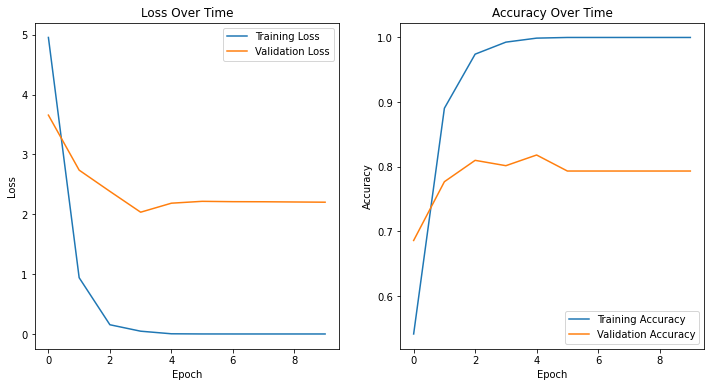

In [ ]:
# Plot training history
plot_training_history(mobilenetv2_history)

## [5.4] EfficientNet-B0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Build and compile EfficientNet model
efficientnet_model = build_and_compile_efficientnet_model(num_classes)

In [ ]:
# Train the model
efficientnet_history = efficientnet_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(X_val, y_val)

Epoch 1/10
24/24 [==============================] - 15s 478ms/step - loss: 14.0232 - accuracy: 0.1353 - val_loss: 8.6444 - val_accuracy: 0.0909
Epoch 2/10
24/24 [==============================] - 10s 415ms/step - loss: 7.1552 - accuracy: 0.1219 - val_loss: 4.4380 - val_accuracy: 0.0909
Epoch 3/10
24/24 [==============================] - 10s 430ms/step - loss: 3.4667 - accuracy: 0.1116 - val_loss: 3.8339 - val_accuracy: 0.0909
Epoch 4/10
24/24 [==============================] - 10s 425ms/step - loss: 2.9771 - accuracy: 0.1395 - val_loss: 3.0190 - val_accuracy: 0.1488
Epoch 5/10
24/24 [==============================] - 10s 429ms/step - loss: 3.3705 - accuracy: 0.1219 - val_loss: 3.0870 - val_accuracy: 0.1901
Epoch 6/10
24/24 [==============================] - 10s 436ms/step - loss: 2.9151 - accuracy: 0.1374 - val_loss: 4.2615 - val_accuracy: 0.1488
Epoch 7/10
24/24 [==============================] - 10s 416ms/step - loss: 3.1097 - accuracy: 0.1395 - val_loss: 3.6218 - val_accuracy: 0.173

In [ ]:
# Calculate average loss and accuracy
efficientnet_average_loss = sum(efficientnet_history.history['val_loss']) / len(efficientnet_history.history['val_loss'])
efficientnet_average_accuracy = sum(efficientnet_history.history['val_accuracy']) / len(efficientnet_history.history['val_accuracy'])

print(f"Average Validation Loss: {efficientnet_average_loss}, Average Validation Accuracy: {efficientnet_average_accuracy}")

Average Validation Loss: 4.54701189994812, Average Validation Accuracy: 0.1462809920310974


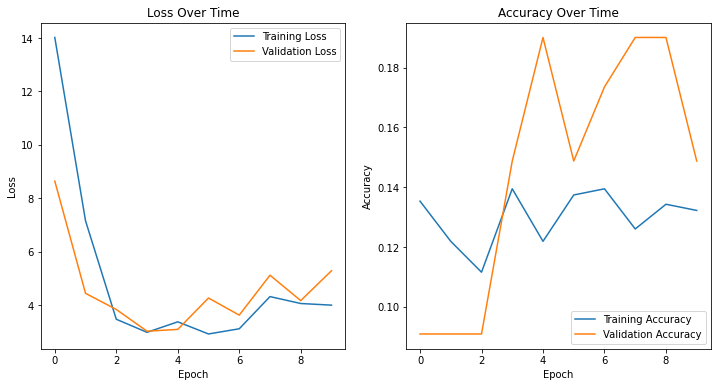

In [ ]:
# Plot training history
plot_training_history(efficientnet_history)

# [6] Save Model

## [6.1] Google Colab

In [ ]:
# Save models
vgg19_model.save('/content/drive/MyDrive/FYP/models/VGG19_augment')
resnet101_model.save('/content/drive/MyDrive/FYP/models/ResNet101_augment')
mobilenetv2_model.save('/content/drive/MyDrive/FYP/models/MobileNetV2_augment')
efficientnet_model.save('/content/drive/MyDrive/FYP/models/EfficientNetB0_augment')

## [6.2] Jupyter

In [ ]:
# Save models
vgg19_model.save('models/VGG19_augment')
resnet101_model.save('models/ResNet101_augment')
mobilenetv2_model.save('models/MobileNetV2_augment')

# Save EfficientNet model in SavedModel format
tf.saved_model.save(efficientnet_model, 'models/EfficientNetB0_augment')

INFO:tensorflow:Assets written to: models/VGG19_augment/assets


INFO:tensorflow:Assets written to: models/VGG19_augment/assets


INFO:tensorflow:Assets written to: models/ResNet101_augment/assets


INFO:tensorflow:Assets written to: models/ResNet101_augment/assets


INFO:tensorflow:Assets written to: models/MobileNetV2_augment/assets


INFO:tensorflow:Assets written to: models/MobileNetV2_augment/assets


INFO:tensorflow:Assets written to: models/EfficientNetB0_augment/assets


INFO:tensorflow:Assets written to: models/EfficientNetB0_augment/assets


# [6] Load Model

## [6.1] Google Colab

In [ ]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/VGG19_augment')
loaded_resnet101_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/ResNet101_augment')
loaded_mobilenetv2_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/MobileNetV2_augment')
loaded_efficientnet_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/EfficientNetB0_augment')

## [6.2] Jupyter

In [ ]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('models/VGG19_augment')
loaded_resnet101_model = tf.keras.models.load_model('models/ResNet101_augment')
loaded_mobilenetv2_model = tf.keras.models.load_model('models/MobileNetV2_augment')
loaded_efficientnet_model = tf.saved_model.load('models/EfficientNetB0_augment')

2024-04-02 16:35:17.253620: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-02 16:35:17.253664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-04-02 16:35:17.253982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# [7] Test and Analyse

## [7.1] VGG-19

In [ ]:
# Evaluate the model on the test data
vgg19_test_loss, vgg19_test_accuracy = loaded_vgg19_model.evaluate(X_test, y_test)
print(f"Test Loss: {vgg19_test_loss}, Test Accuracy: {vgg19_test_accuracy}")

4/4 [==============================] - 8s 2s/step - loss: 1.0042 - accuracy: 0.6639
Test Loss: 1.0042181015014648, Test Accuracy: 0.6639344096183777


In [ ]:
vgg19_predicted_labels, vgg19_true_labels_list = make_predictions_and_evaluate(loaded_vgg19_model, X_test, y_test)

4/4 [==============================] - 8s 2s/step


In [ ]:
calculate_classification_metrics(vgg19_true_labels_list, vgg19_predicted_labels)

Accuracy: 0.6639
Precision: 0.5814
Recall: 0.6034
F1 Score: 0.5922


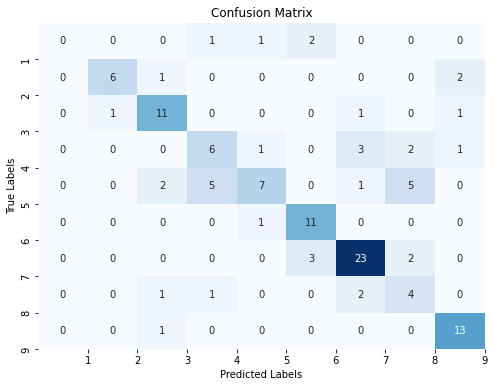

In [ ]:
display_confusion_matrix(vgg19_true_labels_list, vgg19_predicted_labels)

## [7.2] ResNet-101

In [ ]:
# Evaluate the model on the test data
resnet101_test_loss, resnet101_test_accuracy = loaded_resnet101_model.evaluate(X_test, y_test)
print(f"Test Loss: {resnet101_test_loss}, Test Accuracy: {resnet101_test_accuracy}")

4/4 [==============================] - 10s 2s/step - loss: 4.4996 - accuracy: 0.1230
Test Loss: 4.499613285064697, Test Accuracy: 0.12295082211494446


In [ ]:
resnet101_predicted_labels, resnet101_true_labels_list = make_predictions_and_evaluate(loaded_resnet101_model, X_test, y_test)

4/4 [==============================] - 10s 2s/step


In [ ]:
calculate_classification_metrics(resnet101_true_labels_list, resnet101_predicted_labels)

Accuracy: 0.1230
Precision: 0.2343
Recall: 0.1283
F1 Score: 0.1658


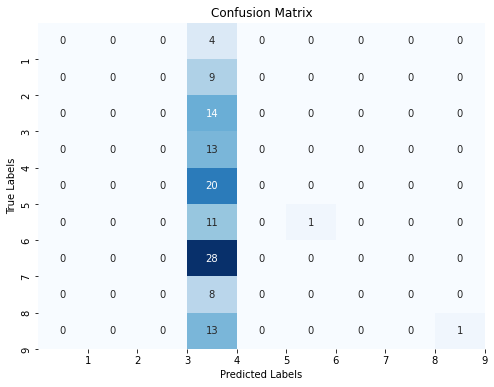

In [ ]:
display_confusion_matrix(resnet101_true_labels_list, resnet101_predicted_labels)

## [7.3] MobileNetV2

In [ ]:
# Evaluate the model on the test data
mobilenetv2_test_loss, mobilenetv2_test_accuracy = loaded_mobilenetv2_model.evaluate(X_test, y_test)
print(f"Test Loss: {mobilenetv2_test_loss}, Test Accuracy: {mobilenetv2_test_accuracy}")

4/4 [==============================] - 2s 329ms/step - loss: 2.8449 - accuracy: 0.7623
Test Loss: 2.844850540161133, Test Accuracy: 0.7622950673103333


In [ ]:
mobilenetv2_predicted_labels, mobilenetv2_true_labels_list = make_predictions_and_evaluate(loaded_mobilenetv2_model, X_test, y_test)

4/4 [==============================] - 2s 323ms/step


In [ ]:
calculate_classification_metrics(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

Accuracy: 0.7623
Precision: 0.7910
Recall: 0.7439
F1 Score: 0.7667


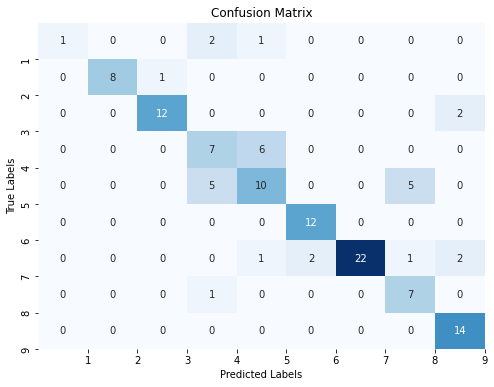

In [ ]:
display_confusion_matrix(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

## [7.4] EfficientNet-B0

In [ ]:
# Extract the 'serving_default' signature
signature = loaded_efficientnet_model.signatures['serving_default']

# Get the inference function or model signature
infer = signature

# Convert input data to float32 if it's not already
efficientnet_X_test = X_test.astype(np.float32)

# Perform evaluation on test data
output = infer(tf.constant(efficientnet_X_test))
predictions = output[list(output.keys())[0]]

# Convert probabilities to class labels (assuming one-hot encoding)
efficientnet_predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class labels (assuming one-hot encoding)
efficientnet_true_labels = np.argmax(y_test, axis=1)

# Calculate test loss
efficientnet_test_loss = tf.keras.losses.categorical_crossentropy(y_test, predictions).numpy().mean()

# Calculate evaluation metrics (e.g., accuracy)
efficientnet_test_accuracy = np.mean(efficientnet_predicted_labels == efficientnet_true_labels)
print(f"Test Loss: {efficientnet_test_loss}, Test Accuracy: {efficientnet_test_accuracy}")

Test Loss: 5.620847225189209, Test Accuracy: 0.09836065573770492


In [ ]:
calculate_classification_metrics(efficientnet_true_labels, efficientnet_predicted_labels)

Accuracy: 0.0984
Precision: 0.0109
Recall: 0.1111
F1 Score: 0.0199


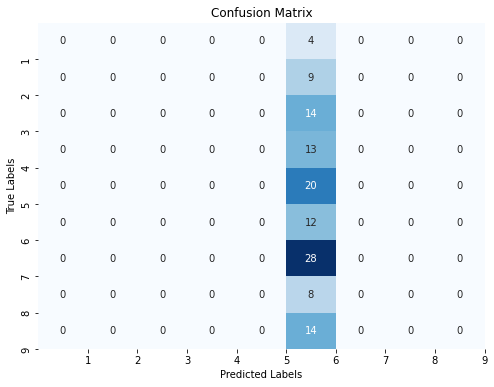

In [ ]:
display_confusion_matrix(efficientnet_true_labels, efficientnet_predicted_labels)